In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib.pyplot import gca,show
from IPython.display import Math, display
import numpy as np
import scipy as sp
import sympy as sym
from scipy.special import kv,zeta, polygamma, factorial, erf
from scipy import integrate
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
import cmasher as cmr
import mpmath as mp
from scipy.integrate import odeint, solve_ivp, ode, quad
import math
from mpmath import *
from sympy import Eq, Symbol, solve
from scipy.interpolate import griddata
import constants
from ipynb.fs.full.parameters import gs 
from ipynb.fs.full.parameters import ge

In [8]:
k = 0.301/np.sqrt(80)*constants.MP


def Hubble(T):
    return 1.66 *np.sqrt(100) * T**2/constants.MP

def HI(T,H_I):
    T_I = H_I/2/np.pi
    if T > T_I:
        return H_I
    else:
        return (1.66 *np.sqrt(100) * T**2/constants.MP)

def time(T):
    return 0.301*(gs(T))**(-1/2)*constants.MP/T**2

def m_(x):
    return 1.68e-7*(0.4**4/vev**2)*(0.4*x)**(6.68)


def energy_density(m,phidot,phi,x):
    result = np.zeros(len(x))
    for i in range(len(result)):
        result[i] = (1/2/k/x[i])**2*phidot[i]**2/2 + m**2*phi[i]**2/2      
    return result

def pressure(m,phidot,phi,x):
    result = np.zeros(len(phidot))
    for i in range(len(result)):
        result[i] = (1/2/k/x[i])**2*phidot[i]**2/2 - m**2*phi[i]**2/2      
    return result

def Abundance(m,theta_i,gosc):
    return 7.02e-65*m**2*theta_i**2/gosc/(m/np.sqrt(gosc))**(3/2)/8.15e-47


def dy_(y,t):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    dx = p
    dp = (1/t - 6/t)*p - 4*k**2*t**2*m**2*x
    return [dx, dp]


def dy_Quartico(y,t):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    dx = p
    dp = (1/t - 6/t)*p - 4*k**2*t**2*m**2*x + 4*k**2*m**2/6/vev**2 * x**3
    return [dx, dp]


def Number_of_particles(theta_dot, theta, t):
    result = list(np.zeros(len(theta)))
    for i in range(len(result)):
        result[i] = (1/2*(theta_dot[i]/2/k/t[i])**2 + m_(t[i])**2*(1 - np.cos(theta[i])))*(k*t[i]**2)**(3/2)/m_(t[i])
    return result


In [165]:
m = 1.0e-29
t = np.logspace(-16,7,10000)

y0 = [1.0e0, 0.0]

y_ULA = odeint(dy_, y0,t)

#y_ULA = solve_ivp(dy_,t_eval = t,y0 = [1.0e1,0.0], t_span=[1.0e-15,1.0e10])

In [183]:
t_ = np.logspace(-16,7, 10000)


y0 = [1.0e0, 0.0]

vev = 1.0e-2

y_ULA_quartico = odeint(dy_Quartico, y0,t_)
#y_ULA_quartico = solve_ivp(dy_Quartico,t_span = [1.0e-17,1.0e15],y0 = [1.0e10,0.0],method = 'DOP853')

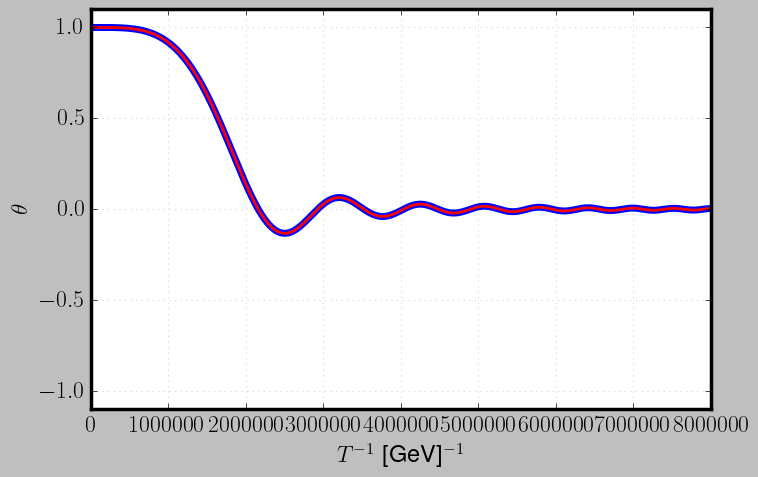

In [184]:
fig = plt.figure(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)

#plt.axvline(x = 1/np.sqrt(m*constants.MP/1.66/2.7/np.sqrt(10)), color = 'gray', lw = 3, ls = 'dashed')



plt.plot(t,y_ULA[:,0] , lw = 5)
#plt.plot(y_ULA.t, y_ULA.y[0,:], lw = 3)



plt.plot(t_,y_ULA_quartico[:,0],color = 'r' ,lw = 2)

#plt.plot(y_ULA_quartico.t, y_ULA_quartico.y[0,:], lw = 3)



anchored_text = AnchoredText(r"$\mathbf{m_\theta = 1.0 \times 10^{-15} }$ eV" + '\n'\
                             r"$\mathbf{\theta_i = 1}$", loc=1)

#ax.add_artist(anchored_text)


#plt.text(1.4e3, 0.0e0, r'$\mathbf{T_{osc} \simeq 0.4}$ MeV', fontsize=14, color = 'k', alpha = 1, rotation = 90, weight = 'light')




plt.ylabel('$\\theta$')
plt.xlabel('$T^{-1}$ [GeV]$^{-1}$')


plt.xlim(1.0e-20,8.0e6)

plt.ylim(-1.1,1.1e0)


plt.grid(alpha = 0.2)

plt.show()

#fig.savefig("theta.pdf", bbox_inches='tight')

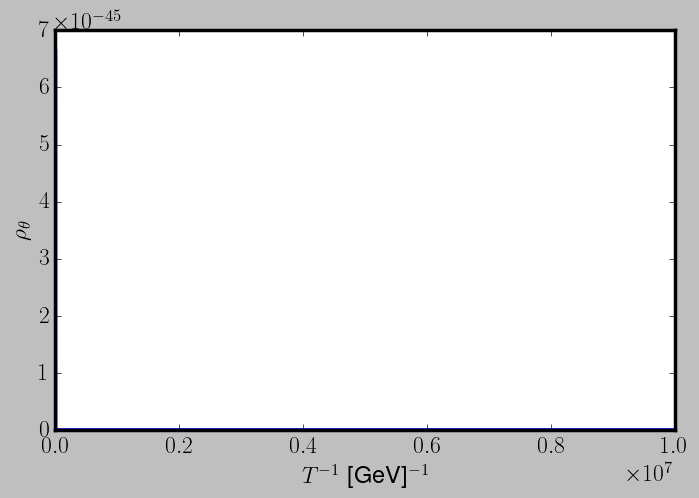

In [190]:
fig = plt.figure(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)


plt.plot(t_,energy_density(m,y_ULA_quartico[:,1], y_ULA_quartico[:,0], t_), lw =3)

#plt.plot(t,energy_density(m,y_ULA[:,1], y_ULA[:,0],t), lw =3)



plt.xlabel('$T^{-1}$ [GeV]$^{-1}$')
plt.ylabel('$\\rho_\\theta$')

#plt.yscale('log')
#plt.xscale('log')

#plt.xlim(1.0e-15,3.0e6)



plt.show()

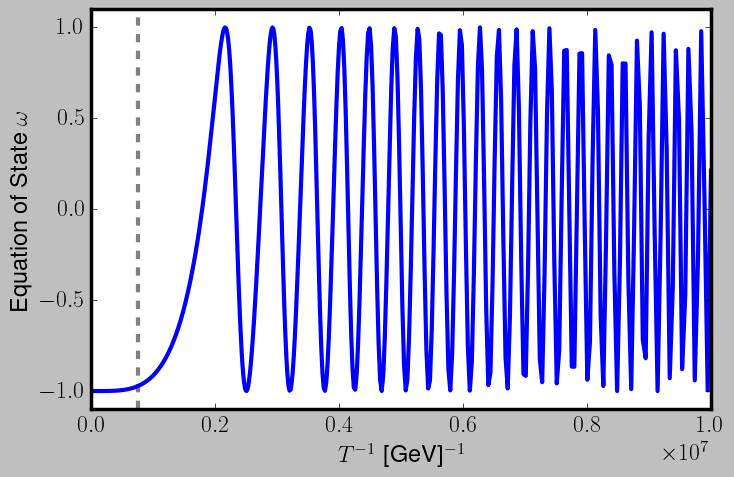

In [147]:
fig = plt.figure(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)


plt.axvline(x = 1/np.sqrt(m*constants.MP/1.66/2.7/np.sqrt(10)), color = 'gray', lw = 3, ls = 'dashed')




plt.plot(t,pressure(m,y_ULA[:,1], y_ULA[:,0],t)/energy_density(m,y_ULA[:,1], y_ULA[:,0],t), lw =3)


#plt.text(1.4e3, -0.8e0, r'$\mathbf{T_{osc} \simeq 0.4}$ MeV', fontsize=14, color = 'k', alpha = 1, rotation = 90, weight = 'light')




plt.xlabel('$T^{-1}$ [GeV]$^{-1}$')
plt.ylabel('Equation of State $\omega$')


plt.xlim(0,10000000)
plt.ylim(-1.1,1.1)



#plt.yscale('log')
#plt.xscale('log')


plt.show()
fig.savefig("omega.pdf", bbox_inches='tight')

<Figure size 1600x1200 with 0 Axes>

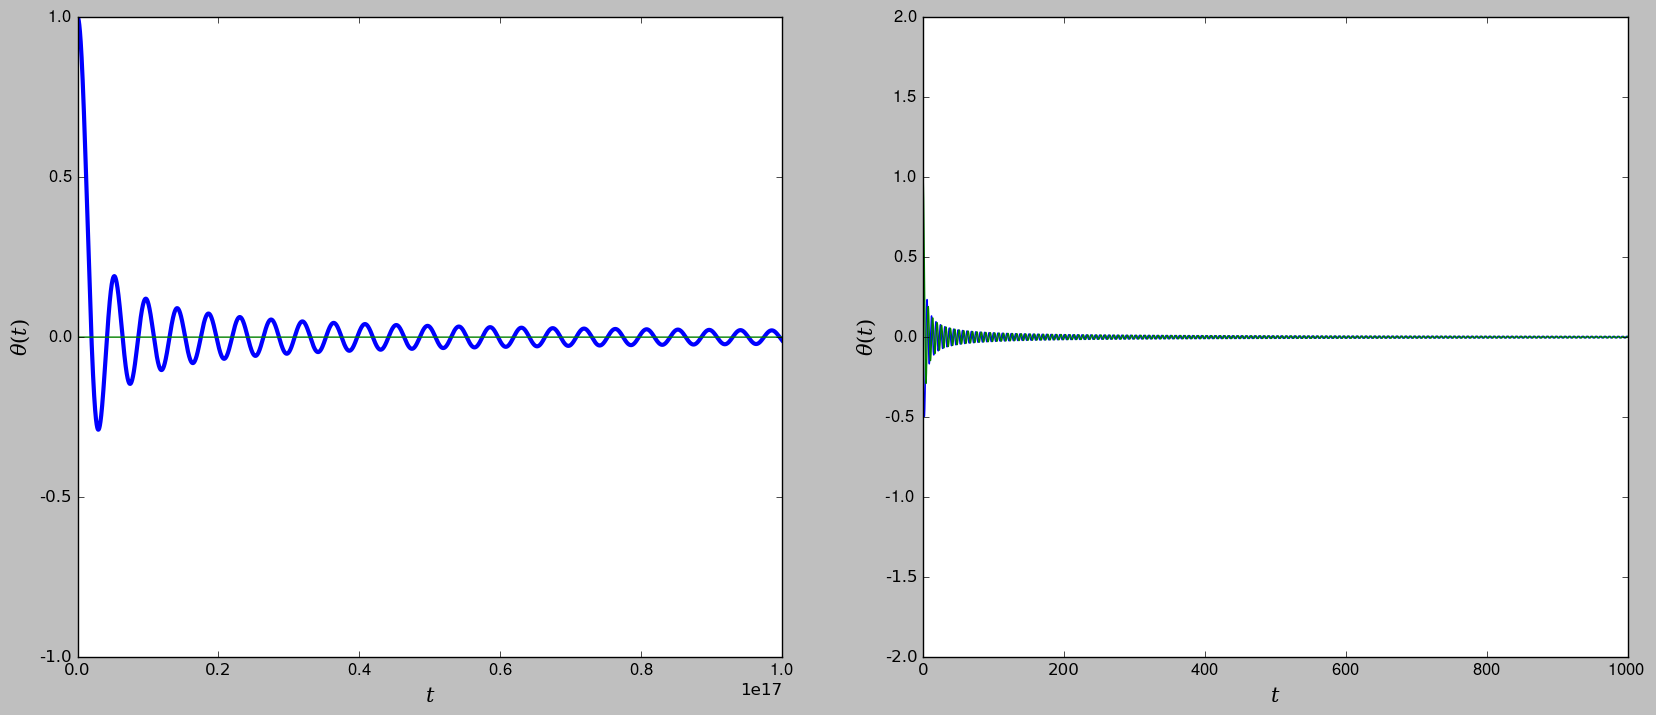

In [158]:
plt.style.use('classic')
plt.figure( dpi = 200)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi =100)
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


#axes[1].plot(y_Wimp.t,y_Wimp.y[0,:], lw = 1)
axes[1].plot(t_wimp,y_Wimp[:,1], lw = 1)
axes[1].plot(t_wimp,y_Wimp[:,0], lw = 1)

axes[0].plot(y_ULA.t,y_ULA.y[0,:], lw = 3)
axes[0].plot(y_ULA.t,y_ULA.y[1,:], lw = 1)


axes[1].set_xlabel("$t$", fontsize = 15)
axes[1].set_ylabel("$\\theta(t)$", fontsize = 15)
axes[0].set_xlabel("$t$", fontsize = 15)
axes[0].set_ylabel("$\\theta(t)$", fontsize = 15)
axes[0].set_ylim(-1,1)
axes[1].set_ylim(-2,2)
axes[1].set_xlim(1.0e-10,1.0e3)
plt.show()

<ipython-input-131-d722bd18a8a1>:10: RuntimeWarning: overflow encountered in double_scalars
  result[i] = 1/2 * a_dot[i]**2 - m**2*vev**2 *np.sin(a[i]/vev)**2
<ipython-input-131-d722bd18a8a1>:4: RuntimeWarning: overflow encountered in double_scalars
  result[i] = 1/2 * a_dot[i]**2 + m**2*vev**2 *np.sin(a[i]/vev)**2
<ipython-input-131-d722bd18a8a1>:25: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot(t_wimp,pressure(y_Wimp[:,1],y_Wimp[:,0])/energy_density(y_Wimp[:,1],y_Wimp[:,0]), lw = 3)


<Figure size 1600x1200 with 0 Axes>

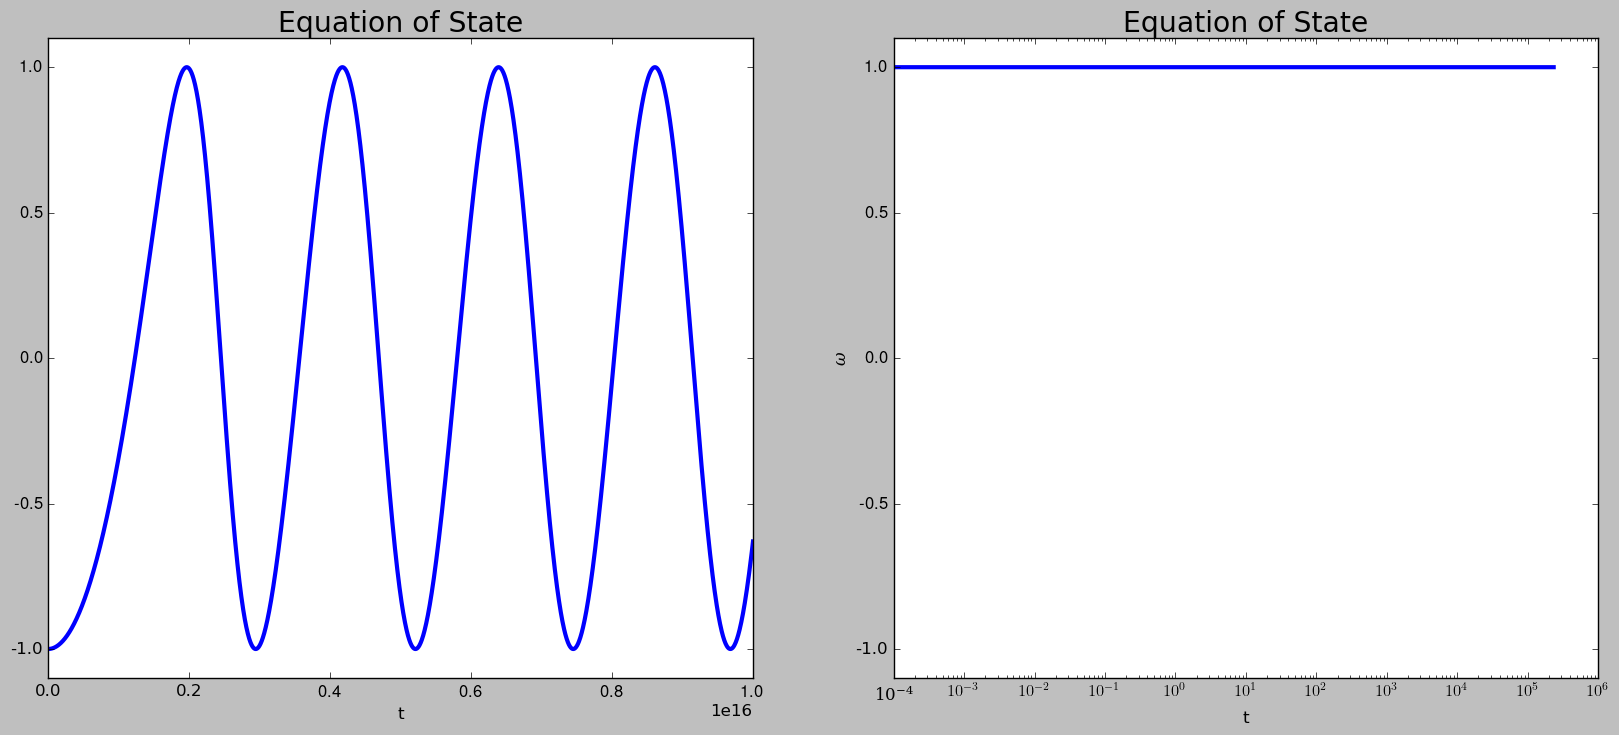

In [131]:
def energy_density(a_dot,a):
    result = np.zeros(len(a_dot))
    for i in range(len(a_dot)):
        result[i] = 1/2 * a_dot[i]**2 + m**2*vev**2 *np.sin(a[i]/vev)**2
    return result

def pressure(a_dot,a):
    result = np.zeros(len(a_dot))
    for i in range(len(a_dot)):
        result[i] = 1/2 * a_dot[i]**2 - m**2*vev**2 *np.sin(a[i]/vev)**2
    return result

plt.style.use('classic')
plt.figure( dpi = 200)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi =100)
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#axes[1].plot(y_Wimp.t,pressure(y_Wimp.y[1,:],y_Wimp.y[0,:])/energy_density(y_Wimp.y[1,:],y_Wimp.y[0,:]), lw = 3)
axes[1].plot(t_wimp,pressure(y_Wimp[:,1],y_Wimp[:,0])/energy_density(y_Wimp[:,1],y_Wimp[:,0]), lw = 3)

axes[0].plot(y_ULA.t,pressure(y_ULA.y[1,:],y_ULA.y[0,:])/energy_density(y_ULA.y[1,:],y_ULA.y[0,:]), lw = 3)


plt.xscale('log')
#plt.yscale('log')
axes[1].set_ylim(-1.1,1.1)
axes[0].set_ylim(-1.1,1.1)
axes[0].set_xlim(1.0e-10,1.0e16)
axes[1].set_xlim(1.0e-4,1.0e6)

axes[0].set_xlabel('t')
axes[1].set_xlabel('t')

plt.ylabel('$\omega$')
axes[0].set_title('Equation of State')
axes[1].set_title('Equation of State')
plt.show()

In [164]:
def mass(t): #Expressão da massa ao quadrado dependendo do tempo
    lambda_qcd = 0.4
    n = 6.68
    T = np.sqrt(0.301/t/np.sqrt(80)*Mp)
    mass_ = 1.68e-7 *(lambda_qcd**4/vev**2)*(lambda_qcd/T)**n
    return mass_

def dy_paper(t, y):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    dx = p
    dp = -3/(2*t)* p - mass(t)*x
    return [dx, dp]

# initial state:
y0 = [1.0e0, 0.0]

# time coodinate to solve the ODE for
t = np.logspace(-10, 18, 1.0e5)

vev = 1.0e10

y = solve_ivp(dy_paper, [1.0e-10,1.0e18], y0, t_eval = t)


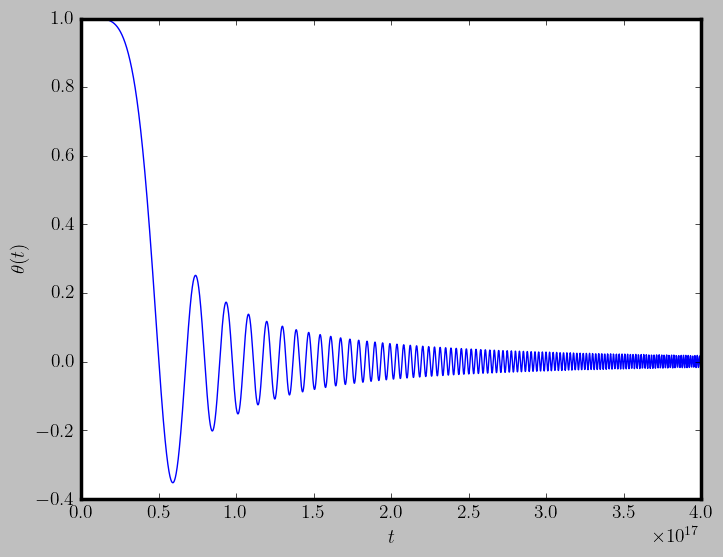

In [67]:
plt.style.use('classic')
fig = plt.figure( dpi = 100)
plt.rcParams["font.size"] = "14"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#plt.plot(t, y2[:,0], 'b')
#plt.plot(t, y[:,0], 'r')


plt.plot(y.t,y.y[0,:], lw = 1)


plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$")
plt.xlim(0,4.0e17)
plt.show()

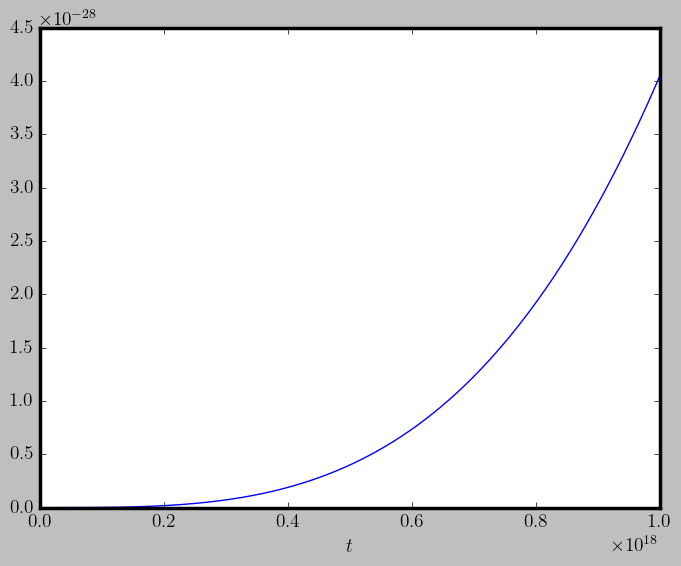

In [166]:
plt.style.use('classic')
fig = plt.figure( dpi = 100)
plt.rcParams["font.size"] = "14"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


vev = 1.0e10
plt.plot(t,mass(t), lw = 1)



plt.xlabel("$t$")
#plt.ylabel("$\\m(t)$")
#plt.ylim(-0.02,0.02)
plt.show()

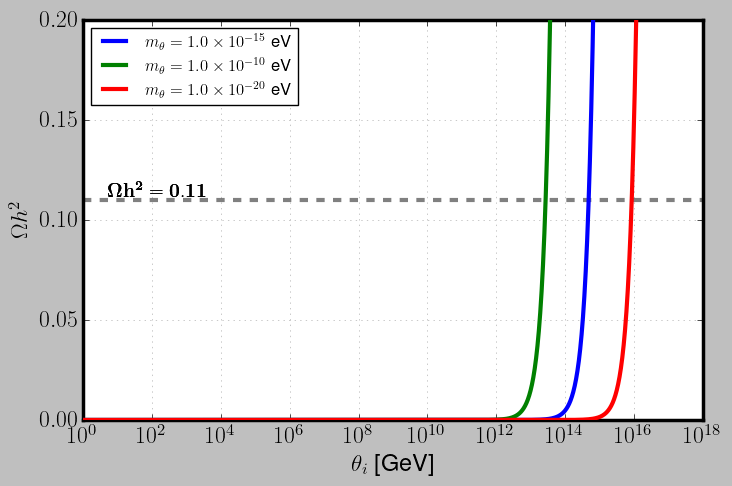

In [10]:
fig = plt.figure(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)






theta_ = np.logspace(0,20,1000)
gosc = 10.3
m = 1.0e-24
plt.plot(theta_,Abundance(m,theta_,gosc), lw = 3,zorder = 4 ,label = '$m_\\theta = 1.0 \\times 10^{-15}$ eV')

m = 1.0e-19


plt.plot(theta_,Abundance(m,theta_,gosc), lw = 3,zorder = 4 , label = '$m_\\theta = 1.0 \\times 10^{-10}$ eV')


m = 1.0e-29


plt.plot(theta_,Abundance(m,theta_,gosc), lw = 3,zorder = 4 , label = '$m_\\theta = 1.0 \\times 10^{-20}$ eV')



plt.text(5.0e0, 0.112, r'$\mathbf{\Omega h^2 = 0.11}$ ', fontsize=14, color = 'k', alpha = 1,  weight = 'light')


plt.text(5.0e0, 0.112, r'$\mathbf{\Omega h^2 = 0.11}$ ', fontsize=14, color = 'k', alpha = 1,  weight = 'light')




plt.axhline(y = 0.11, color = 'gray', lw = 3, ls = 'dashed')



plt.ylabel('$\Omega h^2$')


plt.xlabel('$\\theta_i$ [GeV]')

plt.legend(fontsize = 12, loc = 2)

plt.ylim(0,0.2)
plt.xlim(1,1.0e18)
plt.xscale('log')
plt.grid(alpha=0.3)
plt.show()

fig.savefig("abundance_1.pdf", bbox_inches='tight')

In [147]:
def Tosc(m):
    T_min = np.sqrt(m*constants.MP/(5*np.sqrt(100)))
    T_max = np.sqrt(m*constants.MP/(5*np.sqrt(3)))
    T_med = (T_max + T_min)/2
    return np.sqrt(m*constants.MP/(5*np.sqrt(ge(T_med))))


def Abundance_plt(m,theta_i,vev):
    result = np.zeros(len(m))
    for i in range(len(m)):
        result[i] = 7.02e-65*m[i]**2*theta_i**2*vev**2/ge(Tosc(m[i]))/(m[i]/np.sqrt(ge(Tosc(m[i]))))**(3/2)/8.15e-47
    return result

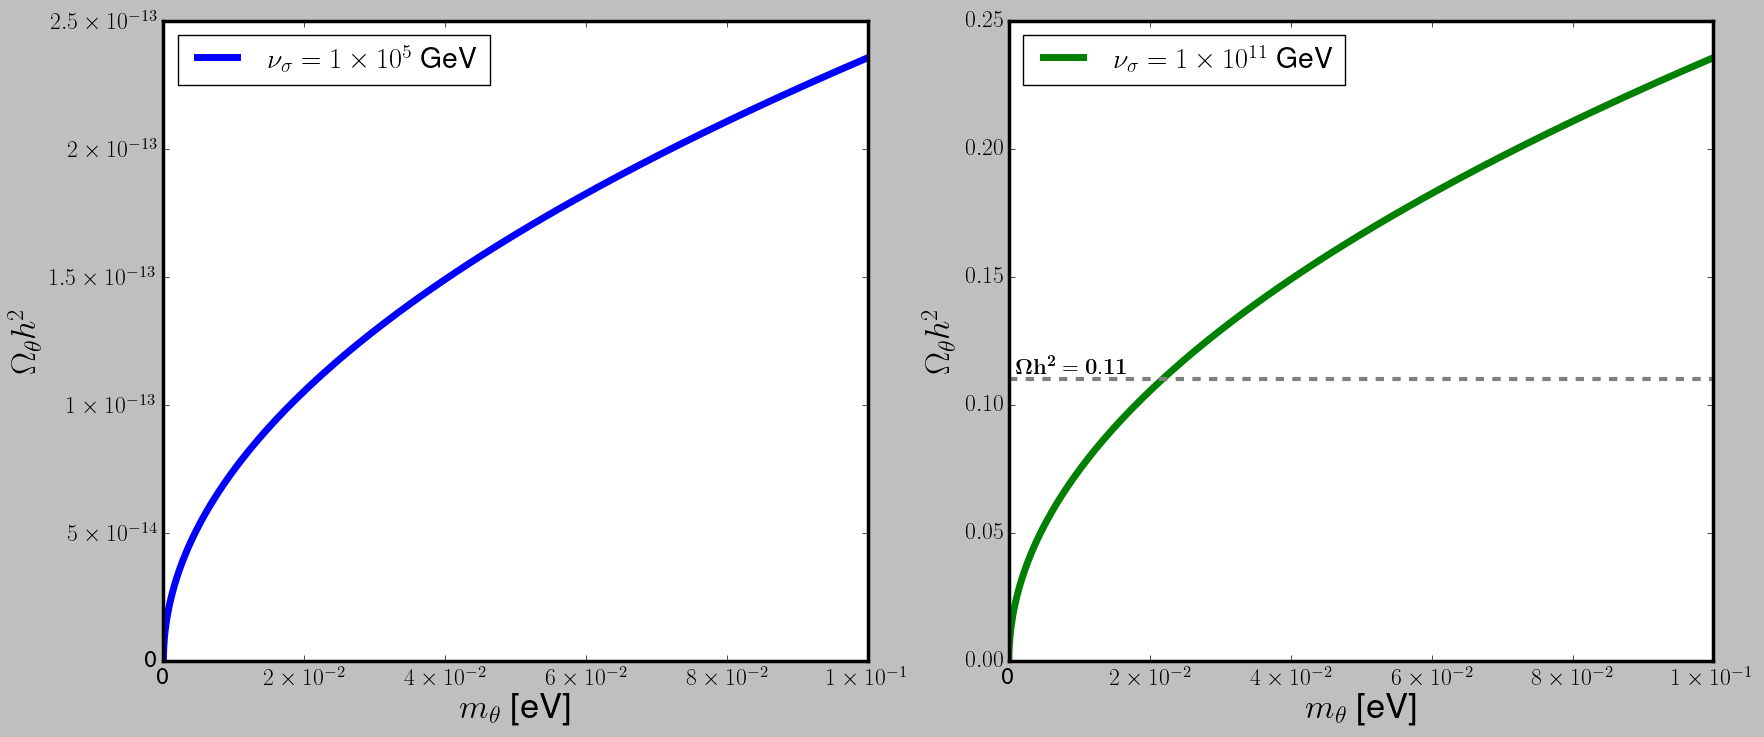

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi =100)

plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)


m = np.logspace(-29,-10,1000)
theta_i = np.sqrt(8.77)

vev = 1.0e5

axes[0].plot(m,Abundance_plt(m,theta_i,vev), lw = 5,label = '$\\nu_\sigma = 1 \\times 10^{5}$ GeV')
axes[0].legend(loc = 2)




#axes[0].axvline(x = 0.2e-10, color = 'gray', lw = 3, ls = 'dashed')



axes[0].set_xlim(0,1.0e-10)
axes[0].set_ylim()

axes[0].set_ylabel('$\\Omega_\\theta h^2$', fontsize = 25)
axes[0].set_xlabel('$m_\\theta$ [eV]', fontsize = 25)

x = [0,0.2e-10,0.4e-10,0.6e-10,0.8e-10,1.0e-10]
valuesx = [0,'$2\\times 10^{-2}$','$4\\times 10^{-2}$','$6\\times 10^{-2}$','$8\\times 10^{-2}$','$1\\times 10^{-1}$']

axes[0].set_xticks(x,valuesx)


y = [0,0.5e-13,1.0e-13,1.5e-13,2.0e-13,2.5e-13]
valuesy = [0,'$5 \\times 10^{-14}$','$1\\times 10^{-13}$','$1.5\\times 10^{-13}$','$2\\times 10^{-13}$','$2.5\\times 10^{-13}$']

axes[0].set_yticks(y,valuesy)

vev = 1.0e11
axes[1].plot(m,Abundance_plt(m,theta_i,vev), lw = 5, color = 'g' , label = '$\\nu_\sigma = 1 \\times 10^{11}$ GeV')
axes[1].legend(loc = 2)

axes[1].axhline(y = 0.11, color = 'gray', lw = 3, ls = 'dashed')

axes[1].text(1.0e-12, 0.112, r'$\mathbf{\Omega h^2 = 0.11}$ ', fontsize=16, color = 'k', alpha = 1,  weight = 'light')


x = [0,0.2e-10,0.4e-10,0.6e-10,0.8e-10,1.0e-10]
valuesx = [0,'$2\\times 10^{-2}$','$4\\times 10^{-2}$','$6\\times 10^{-2}$','$8\\times 10^{-2}$','$1\\times 10^{-1}$']

axes[1].set_xticks(x,valuesx)


axes[1].set_ylabel('$\\Omega_\\theta h^2$', fontsize = 25)
axes[1].set_xlabel('$m_\\theta$ [eV]', fontsize = 25)

plt.show()
fig.savefig("abundance_2.pdf", bbox_inches='tight')

In [1]:
8.8e13/3.0e-5

2.9333333333333335e+18